In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import numpy as np
import gym
import gnwrapper

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [3]:
ENV_NAME = 'CartPole-v0'

In [4]:
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 16)                80        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0

In [6]:
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

In [7]:
dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

Training for 10000 steps ...


/usr/local/bin/python/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/bin/python/lib/python3.7/site-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   16/10000: episode: 1, duration: 0.777s, episode steps:  16, steps per second:  21, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.625 [0.000, 1.000],  loss: 0.599421, mae: 0.600416, mean_q: 0.074502
   30/10000: episode: 2, duration: 0.113s, episode steps:  14, steps per second: 124, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.714 [0.000, 1.000],  loss: 0.563505, mae: 0.587395, mean_q: 0.150306


/usr/local/bin/python/lib/python3.7/site-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/bin/python/lib/python3.7/site-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   41/10000: episode: 3, duration: 0.091s, episode steps:  11, steps per second: 121, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 0.480536, mae: 0.548658, mean_q: 0.260102
   54/10000: episode: 4, duration: 0.108s, episode steps:  13, steps per second: 120, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.692 [0.000, 1.000],  loss: 0.382063, mae: 0.522244, mean_q: 0.424904
   64/10000: episode: 5, duration: 0.084s, episode steps:  10, steps per second: 119, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.301777, mae: 0.507611, mean_q: 0.610340
   85/10000: episode: 6, duration: 0.161s, episode steps:  21, steps per second: 131, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.714 [0.000, 1.000],  loss: 0.201397, mae: 0.500669, mean_q: 0.904420
   99/10000: episode: 7, duration: 0.110s, episode steps:  14, steps per

  887/10000: episode: 40, duration: 0.246s, episode steps:  33, steps per second: 134, episode reward: 33.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.515 [0.000, 1.000],  loss: 0.296167, mae: 3.644490, mean_q: 7.116068
  903/10000: episode: 41, duration: 0.120s, episode steps:  16, steps per second: 133, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 0.466617, mae: 3.732291, mean_q: 7.210036
  920/10000: episode: 42, duration: 0.134s, episode steps:  17, steps per second: 127, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.588 [0.000, 1.000],  loss: 0.370328, mae: 3.812793, mean_q: 7.395401
  941/10000: episode: 43, duration: 0.157s, episode steps:  21, steps per second: 134, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 0.224751, mae: 3.862555, mean_q: 7.644996
  981/10000: episode: 44, duration: 0.292s, episode steps:  40, step

 6136/10000: episode: 75, duration: 1.442s, episode steps: 200, steps per second: 139, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.505 [0.000, 1.000],  loss: 3.596189, mae: 25.208738, mean_q: 51.001102
 6336/10000: episode: 76, duration: 1.494s, episode steps: 200, steps per second: 134, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 2.682545, mae: 25.779917, mean_q: 52.279747
 6536/10000: episode: 77, duration: 1.439s, episode steps: 200, steps per second: 139, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.495 [0.000, 1.000],  loss: 4.496916, mae: 26.389032, mean_q: 53.406670
 6736/10000: episode: 78, duration: 1.469s, episode steps: 200, steps per second: 136, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 3.910655, mae: 27.017578, mean_q: 54.705753
 6936/10000: episode: 79, duration: 1.446s, episode step

In [8]:
dqn.save_weights('cartpole.h5f', overwrite=True)

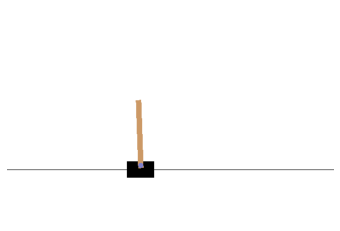

Episode 5: reward: 200.000, steps: 200


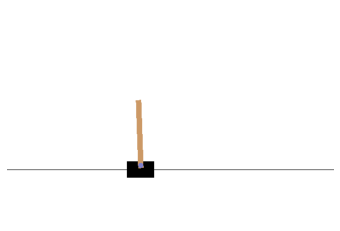

In [9]:
dqn.test(gnwrapper.Animation(env), nb_episodes=5, visualize=True)